In [2]:
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import re
import json
import csv
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['pdf.fonttype'] = 42

C:\Users\bobva\AppData\Local\Temp\ipykernel_22048\3613594551.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Species', y='Counts', hue='LEA_subfamily', data=count_df, ci=None)


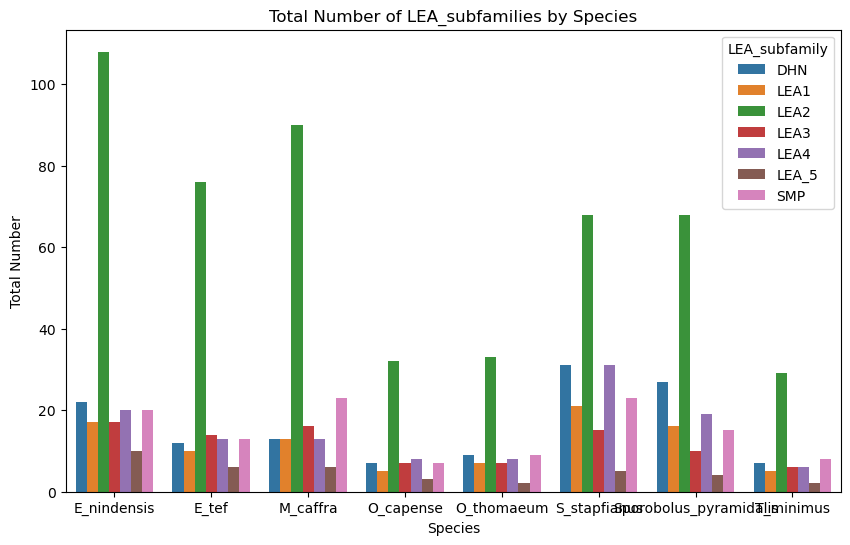

In [9]:
df = pd.read_csv('LEA_list_Chloridoids.txt', delimiter='\t')

# Step 2: Count the occurrences
count_df = df.groupby(['Species', 'LEA_subfamily']).size().reset_index(name='Counts')

# Step 3: Calculate proportions
total_counts = count_df.groupby('Species')['Counts'].transform('sum')
count_df['Proportion'] = count_df['Counts'] / total_counts

# Step 4: Plot
# Adjusting figure size for clarity
plt.figure(figsize=(10, 6))

# Plotting the total counts
sns.barplot(x='Species', y='Counts', hue='LEA_subfamily', data=count_df, ci=None)

# Adding a title
plt.title('Total Number of LEA_subfamilies by Species')
plt.ylabel('Total Number')
plt.xlabel('Species')
plt.savefig('LEA_subfamily_totals.pdf')
plt.show()


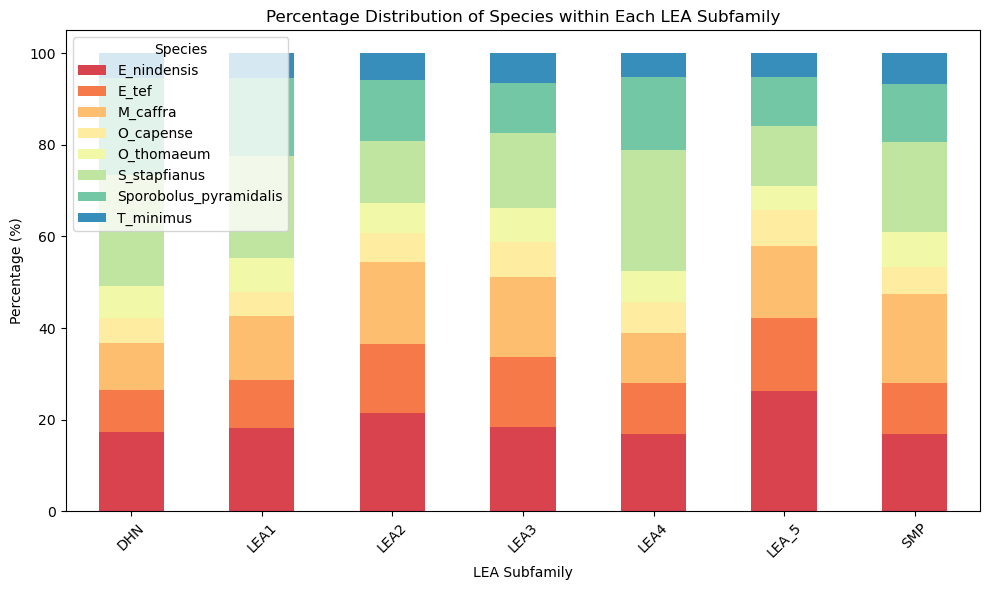

In [7]:

count_df = df.groupby(['Species', 'LEA_subfamily']).size().reset_index(name='Counts')
total_counts_by_subfamily = count_df.groupby('LEA_subfamily')['Counts'].transform('sum')
count_df['Percentage'] = (count_df['Counts'] / total_counts_by_subfamily) * 100
pivot_df = count_df.pivot(index='LEA_subfamily', columns='Species', values='Percentage').fillna(0)

# Choose a color palette
palette = sns.color_palette("Spectral", len(pivot_df.columns))  # Example palette
# For more palette options, check sns.color_palette documentation

# Plotting with the specified color palette
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=palette)

plt.title('Percentage Distribution of Species within Each LEA Subfamily')
plt.ylabel('Percentage (%)')
plt.xlabel('LEA Subfamily')
plt.xticks(rotation=45)
plt.legend(title='Species')
plt.tight_layout()

# Save the figure as a PDF
plt.savefig('LEA_subfamily_distribution.pdf')

plt.show()


In [12]:
# Load the TSV file
df = pd.read_csv('TPM_Ocap.txt', sep='\t')
df.iloc[:, 1:] = np.log2(df.iloc[:, 1:] + 1)

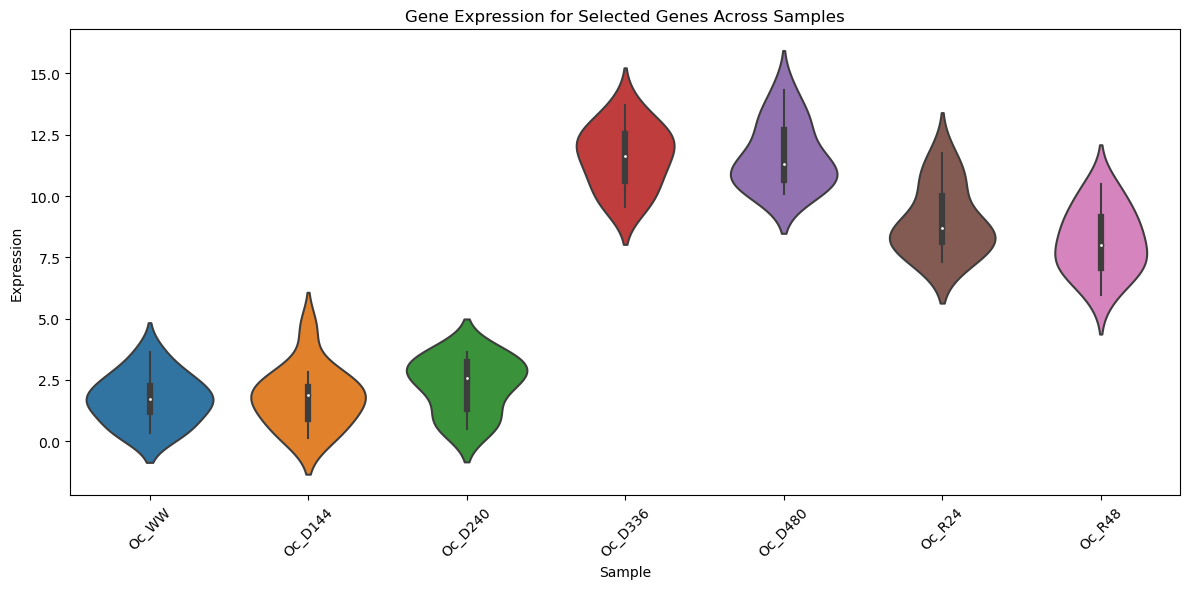

In [16]:

# Assuming you have a list of gene IDs
list_of_gene_ids = ['Ocap_C6_09326', 'Ocap_C8_27745', 'Ocap_C8_28125', 'Ocap_C8_28126', 'Ocap_C8_28416', 'Ocap_C8_28420', 'Ocap_C8_28624', 'Ocap_C8_28625', 'Ocap_C8_28626', 'Ocap_C8_28647', 'Ocap_C8_28650', 'Ocap_C8_28652', 'Ocap_C8_28655']  # Replace with your actual gene IDs

# Filter for specific genes in the list
df_filtered = df[df['GeneID'].isin(list_of_gene_ids)]

# Melt the DataFrame to long format
df_melted = df_filtered.melt(id_vars='GeneID', var_name='Sample', value_name='Expression')

# Create the violin plot
plt.figure(figsize=(12, 6))  # Adjust the size as needed
sns.violinplot(x='Sample', y='Expression', data=df_melted)
plt.xticks(rotation=45)  # Rotate the sample names for better readability
plt.title('Gene Expression for Selected Genes Across Samples')
plt.tight_layout()  # Adjust subplot parameters to give some padding
plt.savefig('ELIP_expression_Oc.pdf')
plt.show()

In [21]:
# Load the TSV file
df = pd.read_csv('TPM_Tmin.txt', sep='\t')
df.iloc[:, 1:] = np.log2(df.iloc[:, 1:] + 1)

In [41]:
df

,GeneID,Mc_WW,Mc_D120,Mc_D216,Mc_D264,Mc_D432,Mc_R24,Mc_R48
0,Mcaff_C1_026131,0.218743,0.028669,0.000000,0.030601,0.087540,0.067079,0.211837
1,Mcaff_C1_026132,0.781410,0.281001,0.974503,0.111063,0.466637,0.151878,0.168257
2,Mcaff_C1_026133,3.438404,3.515832,4.264943,3.422767,3.207002,4.389872,3.884656
3,Mcaff_C1_026134,8.836601,9.589325,9.816637,9.138666,4.812083,6.029573,6.099875
4,Mcaff_C1_026135,0.279724,0.246210,0.331676,0.111298,0.067524,0.157635,0.038634
...,...,...,...,...,...,...,...,...
82711,Mcaff_C99_071943,0.156888,0.073810,0.197755,0.076272,0.021704,0.109275,0.351510
82712,Mcaff_C99_071944,0.842923,0.510445,0.256508,0.264638,0.229321,0.305013,0.439001
82713,Mcaff_C99_071945,1.694278,1.466021,1.389388,1.354840,0.417799,0.998040,1.051761
82714,Mcaff_C99_071946,1.373592,1.540537,1.967390,1.725328,1.029851,0.916513,0.945430


In [54]:
df_melted

,GeneID,LEA_subfamily,Sample,Expression
0,Ocap_C1_13494,DHN,Oc_WW,5.209595
1,Ocap_C1_13502,LEA2,Oc_WW,0.701443
2,Ocap_C1_13847,SMP,Oc_WW,3.297420
3,Ocap_C1_14014,LEA3,Oc_WW,1.049020
4,Ocap_C1_14607,SMP,Oc_WW,0.338731
...,...,...,...,...
478,Ocap_C8_28031,DHN,Oc_R48,3.009487
479,Ocap_C9_06010,LEA2,Oc_R48,5.332021
480,Ocap_C9_06073,LEA2,Oc_R48,1.504292
481,Ocap_C9_06212,LEA2,Oc_R48,5.340600


<Figure size 1200x600 with 0 Axes>

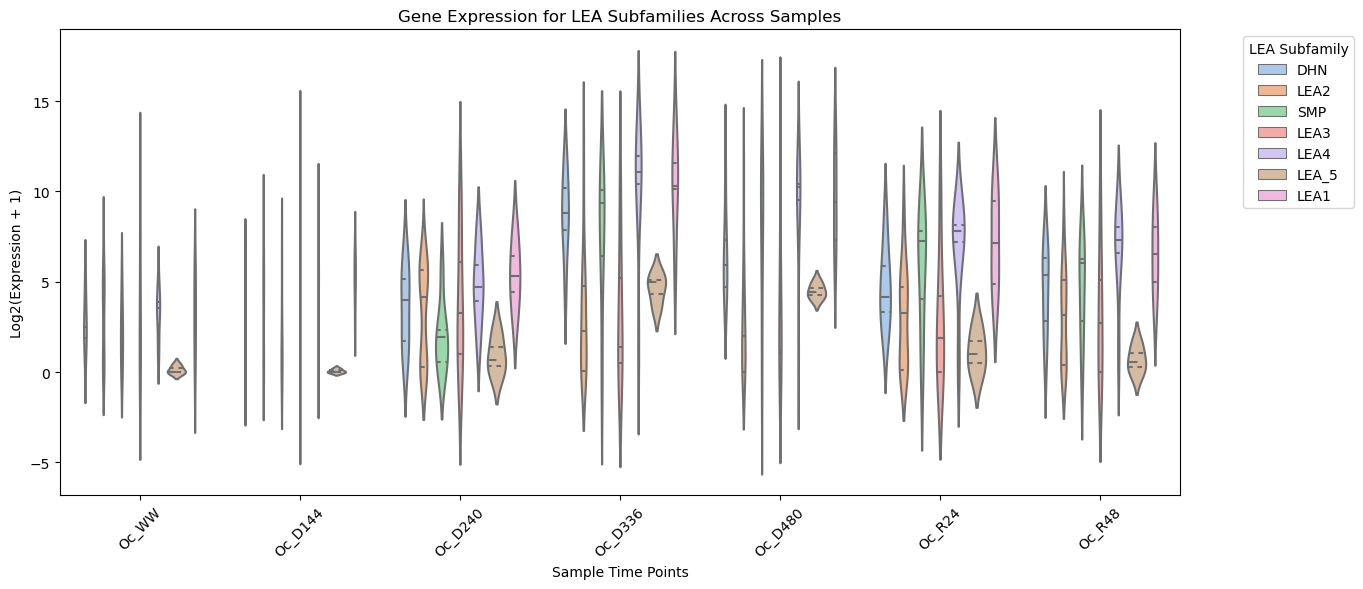

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the TSV file for expression data
df = pd.read_csv('TPM_Ocap.txt', sep='\t')

# Log transform the expression values for better visualization
df.iloc[:, 1:] = np.log2(df.iloc[:, 1:] + 1)

# Load the second DataFrame from O_capLeas.txt
df_lea = pd.read_csv('O_capense_LEAs.txt', sep='\t')

# Assuming list_of_gene_ids is relevant to df_lea's Gene column
list_of_gene_ids = df_lea['Gene'].unique()  # This automatically grabs all unique Gene IDs from df_lea

# Filter for specific genes in the list
df_filtered = df[df['GeneID'].isin(list_of_gene_ids)]

# Merge the expression data with LEA_subfamily information
df_merged = pd.merge(df_filtered, df_lea, left_on='GeneID', right_on='Gene', how='inner')

# Select the columns of interest along with GeneID and LEA_subfamily for labeling
columns_of_interest = ['GeneID', 'LEA_subfamily', 'Oc_WW', 'Oc_D144', 'Oc_D240', 'Oc_D336', 'Oc_D480', 'Oc_R24', 'Oc_R48']
df_selected = df_merged[columns_of_interest]

# Melt the DataFrame to long format for plotting
df_melted = df_selected.melt(id_vars=['GeneID', 'LEA_subfamily'], var_name='Sample', value_name='Expression')

# Plotting
# Adjust figsize to accommodate the number of samples or LEA_subfamilies
plt.figure(figsize=(12, 6))

# Create violin plots for each LEA_subfamily grouped by each sample
plt.figure(figsize=(12, 6))
sns.violinplot(x='Sample', y='Expression', hue='LEA_subfamily', data=df_melted, inner='quart', palette='pastel')

plt.xticks(rotation=45)  # Rotate the sample names for better readability
plt.title('Gene Expression for LEA Subfamilies Across Samples')
plt.xlabel('Sample Time Points')
plt.ylabel('Log2(Expression + 1)')
plt.tight_layout()  # Adjust subplot parameters to give some padding
plt.legend(title='LEA Subfamily', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

plt.show()

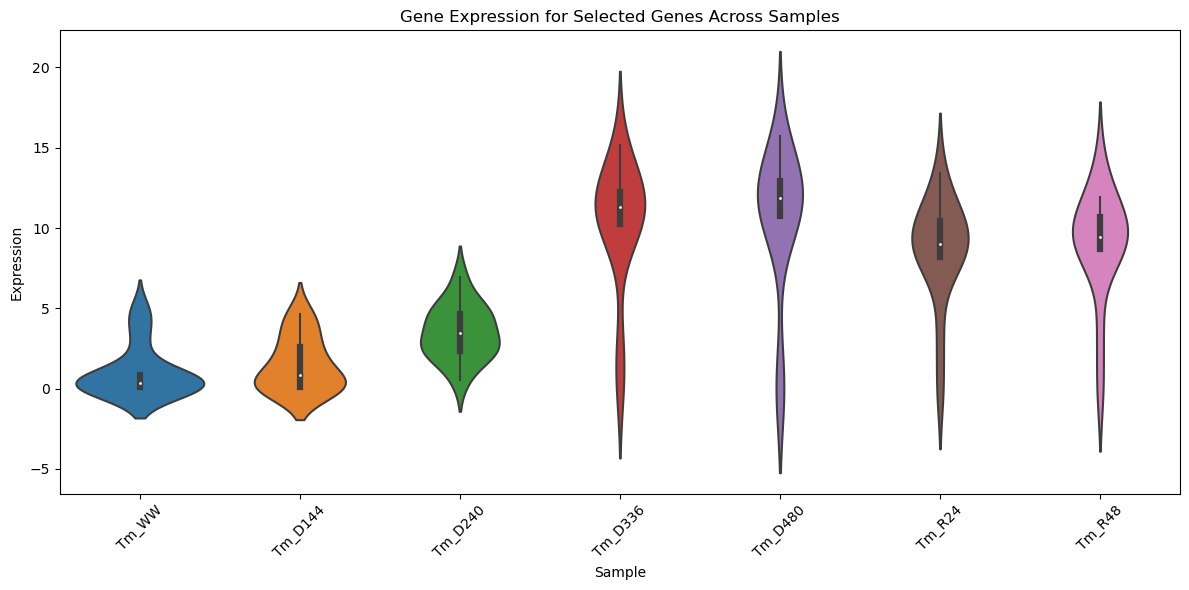

In [22]:
# Load the TSV file
df = pd.read_csv('TPM_Tmin.txt', sep='\t')
df.iloc[:, 1:] = np.log2(df.iloc[:, 1:] + 1)
# Assuming you have a list of gene IDs
list_of_gene_ids = ['Tmin_C13_16565','Tmin_C13_16566','Tmin_C13_16567','Tmin_C13_16568','Tmin_C13_16569','Tmin_C13_16570','Tmin_C3_00691','Tmin_C3_00692','Tmin_C3_00694','Tmin_C3_00695','Tmin_C4_22383','Tmin_C8_24827','Tmin_C8_24848','Tmin_C8_24849','Tmin_C8_24850']

# Filter for specific genes in the list
df_filtered = df[df['GeneID'].isin(list_of_gene_ids)]

# Melt the DataFrame to long format
df_melted = df_filtered.melt(id_vars='GeneID', var_name='Sample', value_name='Expression')

# Create the violin plot
plt.figure(figsize=(12, 6))  # Adjust the size as needed
sns.violinplot(x='Sample', y='Expression', data=df_melted)
plt.xticks(rotation=45)  # Rotate the sample names for better readability
plt.title('Gene Expression for Selected Genes Across Samples')
plt.tight_layout()  # Adjust subplot parameters to give some padding
plt.savefig('ELIP_expression_Tm.pdf')
plt.show()

In [32]:
# Load the TSV file
df = pd.read_csv('TPM_Mcaf.txt', sep='\t')
df.iloc[:, 1:] = np.log2(df.iloc[:, 1:] + 1)

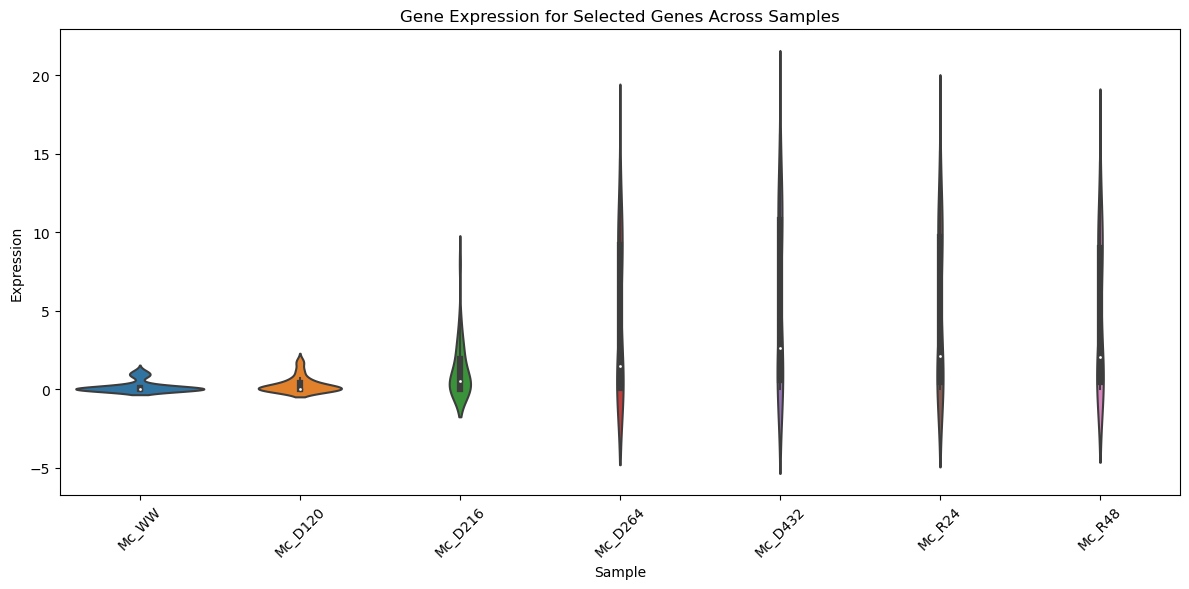

In [33]:
# Assuming you have a list of gene IDs
list_of_gene_ids = ['Mcaff_C14_038853','Mcaff_C14_038854','Mcaff_C14_038855','Mcaff_C14_038856','Mcaff_C14_038865','Mcaff_C14_038868','Mcaff_C14_038876','Mcaff_C14_038877','Mcaff_C14_038878','Mcaff_C14_038879','Mcaff_C14_038880','Mcaff_C3_008898','Mcaff_C3_008913','Mcaff_C3_008915','Mcaff_C3_008916','Mcaff_C3_008924','Mcaff_C3_008925','Mcaff_C3_008994','Mcaff_C3_008996','Mcaff_C3_008997','Mcaff_C3_008998','Mcaff_C3_008999','Mcaff_C42_003505','Mcaff_C42_003510','Mcaff_C42_003511','Mcaff_C42_003512','Mcaff_C42_003515','Mcaff_C42_003521','Mcaff_C42_003523','Mcaff_C42_003528','Mcaff_C42_003529','Mcaff_C42_003530']

# Filter for specific genes in the list
df_filtered = df[df['GeneID'].isin(list_of_gene_ids)]

# Melt the DataFrame to long format
df_melted = df_filtered.melt(id_vars='GeneID', var_name='Sample', value_name='Expression')

# Create the violin plot
plt.figure(figsize=(12, 6))  # Adjust the size as needed
sns.violinplot(x='Sample', y='Expression', data=df_melted)
plt.xticks(rotation=45)  # Rotate the sample names for better readability
plt.title('Gene Expression for Selected Genes Across Samples')
plt.tight_layout()  # Adjust subplot parameters to give some padding
plt.savefig('ELIP_expression_Mc.pdf')
plt.show()

In [37]:
df_filtered = df_filtered.set_index(df_filtered.columns[0])

In [38]:
df_filtered

,Mc_WW,Mc_D120,Mc_D216,Mc_D264,Mc_D432,Mc_R24,Mc_R48
GeneID,,,,,,,
Mcaff_C14_038853,0.000000,0.000000,0.826699,9.375077,10.760304,9.712213,8.904118
Mcaff_C14_038854,0.339479,0.608019,2.424968,7.717055,8.968261,7.806513,7.101725
Mcaff_C14_038855,0.000000,0.000000,0.000000,0.000000,0.139942,0.119200,0.000000
Mcaff_C14_038856,0.000000,0.410201,0.349135,1.093894,2.271691,1.629560,0.930350
Mcaff_C14_038865,0.912408,1.120928,1.152143,3.303862,4.766681,3.778750,2.947093
Mcaff_C14_038868,0.000000,0.000000,0.940972,10.577052,12.326683,11.003514,10.511283
Mcaff_C14_038876,0.000000,0.000000,0.000000,1.422922,1.849685,1.309264,1.260934
Mcaff_C14_038877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mcaff_C14_038878,0.000000,0.000000,0.000000,0.000000,0.201511,0.095831,0.000000


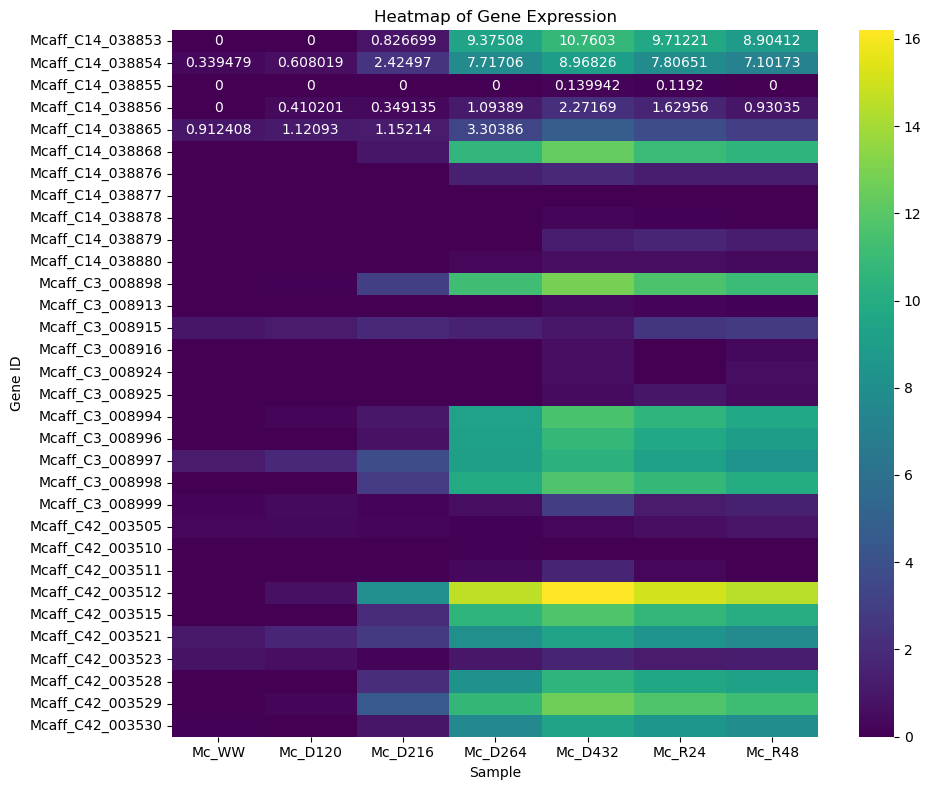

In [39]:
# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(df_filtered, annot=True, fmt="g", cmap='viridis')
# annot=True to display the expression values in the cells, set to False if not needed
# fmt="g" to avoid scientific notation, adjust as needed
# cmap='viridis' for the color map, change it according to your preference

plt.title('Heatmap of Gene Expression')
plt.ylabel('Gene ID')
plt.xlabel('Sample')
plt.tight_layout()  # Adjust subplot parameters to give some padding

plt.show()

In [31]:
df_melted

,GeneID,Sample,Expression
0,Mcaff_C14_038853,Mc_WW,0.000000
1,Mcaff_C14_038854,Mc_WW,0.339479
2,Mcaff_C14_038855,Mc_WW,0.000000
3,Mcaff_C14_038856,Mc_WW,0.000000
4,Mcaff_C14_038865,Mc_WW,0.912408
...,...,...,...
219,Mcaff_C42_003521,Mc_R48,7.672451
220,Mcaff_C42_003523,Mc_R48,1.261101
221,Mcaff_C42_003528,Mc_R48,9.192075
222,Mcaff_C42_003529,Mc_R48,11.103297


In [ ]:
Orthogroups.GeneCount.tsv

In [21]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from statsmodels.stats.multitest import multipletests

# Step 1: Import the data
data = pd.read_csv('Orthogroups.GeneCount.tsv', sep='\t')
species_cols = data.columns[1:-1]  # exclude Orthogroup and Total columns

# Initialize a list to store Z-scores and species information
results = []

# Iterate through each orthogroup and species
for _, row in data.iterrows():
    orthogroup = row['Orthogroup']
    # Select gene counts for this orthogroup across all species
    gene_counts = row[species_cols].astype(float)  # Ensure numeric calculations
    expected = gene_counts.mean()  # Mean across this orthogroup for all species
    std_dev = gene_counts.std()  # Std dev across this orthogroup for all species
    
    for species in species_cols:
        observed = row[species]
        if std_dev > 0:  # Prevent division by zero
            # Calculate Z-score based on orthogroup-specific stats
            z_score = (observed - expected) / std_dev
            # Convert Z-score to p-value for a one-sided test
            p_value = 1 - norm.cdf(z_score)
            results.append((orthogroup, species, z_score, p_value))

# Convert to DataFrame
results_df = pd.DataFrame(results, columns=['Orthogroup', 'Species', 'Z_Score', 'P_Value'])

# Step 3: Adjust p-values using the Benjamini-Hochberg procedure
p_adjusted = multipletests(results_df['P_Value'], alpha=0.05, method='fdr_bh')
results_df['P_Adjusted'] = p_adjusted[1]
results_df['Significant'] = p_adjusted[0]

# Filter to find significant expansions
significant_expansions = results_df[results_df['Significant']]

print(significant_expansions)


        Orthogroup      Species   Z_Score       P_Value    P_Adjusted  \
5        OG0000000  E_nindensis  2.994177  1.375933e-03  4.138327e-02   
107      OG0000003  E_nindensis  3.248111  5.808691e-04  1.983573e-02   
173      OG0000005   E_coracana  3.358830  3.913656e-04  1.361234e-02   
269      OG0000007   Z_japonica  5.658732  7.624784e-09  6.888575e-07   
317      OG0000009     M_caffra  3.469308  2.609007e-04  9.216808e-03   
...            ...          ...       ...           ...           ...   
2269227  OG0066741       Z_mays  5.659453  7.592798e-09  6.871714e-07   
2269261  OG0066742       Z_mays  5.659453  7.592798e-09  6.871714e-07   
2269295  OG0066743       Z_mays  5.659453  7.592798e-09  6.871714e-07   
2269329  OG0066744       Z_mays  5.659453  7.592798e-09  6.871714e-07   
2269363  OG0066745       Z_mays  5.659453  7.592798e-09  6.871714e-07   

         Significant  
5               True  
107             True  
173             True  
269             True  
317     

In [22]:
significant_expansions.to_csv('significant_expansions.tsv', sep='\t', index=False)


In [23]:
# Count the number of expanded orthogroups for each species
expanded_counts = significant_expansions.groupby('Species').size().reset_index(name='Expanded_Orthogroups_Count')

# Print the DataFrame to see the counts
print(expanded_counts)

# Save the counts to a TSV file
expanded_counts.to_csv('expanded_orthogroups_counts.tsv', sep='\t', index=False)

             Species  Expanded_Orthogroups_Count
0          A_comosus                         848
1         A_thaliana                         795
2       B_distachyon                         684
3         E_coracana                        1810
4          E_curvula                        2899
5        E_nindensis                        8863
6           E_pilosa                        5304
7              E_tef                        5001
8          H_vulgare                        1639
9        L_brevidens                        1053
10     L_subracemosa                        1604
11          M_caffra                        3622
12      M_polymorpha                         987
13      M_truncatula                        2633
14         O_capense                         678
15          O_sativa                        1390
16        O_thomaeum                         691
17          P_patens                        2426
18         S_bicolor                         724
19         S_italica

In [24]:
# Filter to include only the rows for the three species of interest
filtered_df = significant_expansions[significant_expansions['Species'].isin(['E_nindensis', 'O_thomaeum', 'S_stapfianus', 'T_spicatus', 'M_caffra', 'O_capense', 'T_minimus'])]

# Now, find the orthogroups that are common to all three species
# This can be done by grouping by Orthogroup and counting the unique species
overlap_counts = filtered_df.groupby('Orthogroup')['Species'].nunique()

# Filter to find orthogroups where the count is 3, meaning all three species are represented
overlapping_orthogroups = overlap_counts[overlap_counts == 3].index.tolist()

# Now, filter the original DataFrame to get the rows corresponding to these overlapping orthogroups
overlapping_expansions = filtered_df[filtered_df['Orthogroup'].isin(overlapping_orthogroups)]

# If you want to see which orthogroups are overlapping, you can print or save this information
print("Overlapping enriched orthogroups in M_caffra, O_capense, and T_minimus:")
print(overlapping_expansions['Orthogroup'].unique())

# Save to a TSV file
overlapping_expansions.to_csv('overlapping_enriched_orthogroups.tsv', sep='\t', index=False)

Overlapping enriched orthogroups in M_caffra, O_capense, and T_minimus:
['OG0021818' 'OG0035363' 'OG0035504' 'OG0035577' 'OG0035594' 'OG0035635'
 'OG0035728' 'OG0035787' 'OG0035843' 'OG0036144' 'OG0036241' 'OG0036286'
 'OG0036306' 'OG0037908' 'OG0037921' 'OG0037963' 'OG0038053' 'OG0038057'
 'OG0038061' 'OG0038107' 'OG0038130' 'OG0038148' 'OG0038162' 'OG0038176'
 'OG0038205' 'OG0038212' 'OG0038221' 'OG0038239' 'OG0038243' 'OG0038244'
 'OG0038262' 'OG0038994' 'OG0038998' 'OG0038999' 'OG0039000' 'OG0039001'
 'OG0039004' 'OG0039011' 'OG0039020' 'OG0039022' 'OG0039033' 'OG0039034'
 'OG0039035' 'OG0039039' 'OG0039043' 'OG0039047' 'OG0039048' 'OG0039052'
 'OG0039057' 'OG0039058' 'OG0039063' 'OG0039064' 'OG0039066' 'OG0039071'
 'OG0039076' 'OG0039077' 'OG0039085' 'OG0039090' 'OG0039322' 'OG0039328'
 'OG0039330' 'OG0039331' 'OG0039333' 'OG0039337' 'OG0039343' 'OG0039350'
 'OG0039359' 'OG0039362' 'OG0041103']


In [28]:
# Filter to include only the rows for the specified species of interest
species_of_interest = ['E_nindensis', 'O_thomaeum', 'S_stapfianus', 'T_spicatus', 'M_caffra', 'O_capense', 'T_minimus']
filtered_df = significant_expansions[significant_expansions['Species'].isin(species_of_interest)]

# Now, find the orthogroups that are common to all specified species
# This can be done by grouping by Orthogroup and counting the unique species
overlap_counts = filtered_df.groupby('Orthogroup')['Species'].nunique()

# The correct count should match the number of species of interest
correct_count = len(species_of_interest)

# Filter to find orthogroups where the count matches the number of species of interest
overlapping_orthogroups = overlap_counts[overlap_counts == correct_count].index.tolist()

# Now, filter the original DataFrame to get the rows corresponding to these overlapping orthogroups
overlapping_expansions = filtered_df[filtered_df['Orthogroup'].isin(overlapping_orthogroups)]

# If you want to see which orthogroups are overlapping, you can print or save this information
print("Overlapping enriched orthogroups in M_caffra, O_capense, and T_minimus:")
print(overlapping_expansions['Orthogroup'].unique())

# Save to a TSV file
overlapping_expansions.to_csv('overlapping_enriched_orthogroups.tsv', sep='\t', index=False)


Overlapping enriched orthogroups in M_caffra, O_capense, and T_minimus:
[]


In [25]:
# Step 1: Identify orthogroups expanded in Z_mays and S_bicolor
expanded_in_exclude_species = significant_expansions[
    significant_expansions['Species'].isin(['Z_mays', 'S_bicolor','B_distachyon', 'E_pilosa', 'E_coracana', 'E_curvula', 'E_tef', 'H_vulgare', 'O_sativa', 'S_italica', 'S_pyramidalis', 'Z_japonica'])
]['Orthogroup'].unique()

# Step 2: Filter the overlapping_expansions to exclude these orthogroups
# Assuming overlapping_expansions is the DataFrame from your previous step that contains overlapping enriched orthogroups in M_caffra, O_capense, and T_minimus
refined_overlapping_expansions = overlapping_expansions[
    ~overlapping_expansions['Orthogroup'].isin(expanded_in_exclude_species)
]

# You can now print or save this refined list
print("Refined overlapping enriched orthogroups in M_caffra, O_capense, and T_minimus, excluding Z_mays and S_bicolor:")
print(refined_overlapping_expansions['Orthogroup'].unique())

# Save to a TSV file
refined_overlapping_expansions.to_csv('refined_overlapping_enriched_orthogroups.tsv', sep='\t', index=False)


Refined overlapping enriched orthogroups in M_caffra, O_capense, and T_minimus, excluding Z_mays and S_bicolor:
['OG0021818' 'OG0035363' 'OG0035504' 'OG0035577' 'OG0035594' 'OG0035635'
 'OG0035728' 'OG0035787' 'OG0035843' 'OG0036144' 'OG0036241' 'OG0036286'
 'OG0036306' 'OG0037908' 'OG0037921' 'OG0037963' 'OG0038053' 'OG0038057'
 'OG0038061' 'OG0038107' 'OG0038130' 'OG0038148' 'OG0038162' 'OG0038176'
 'OG0038205' 'OG0038212' 'OG0038221' 'OG0038239' 'OG0038243' 'OG0038244'
 'OG0038262' 'OG0038994' 'OG0038998' 'OG0038999' 'OG0039000' 'OG0039001'
 'OG0039004' 'OG0039011' 'OG0039020' 'OG0039022' 'OG0039033' 'OG0039034'
 'OG0039035' 'OG0039039' 'OG0039043' 'OG0039047' 'OG0039048' 'OG0039052'
 'OG0039057' 'OG0039058' 'OG0039063' 'OG0039064' 'OG0039066' 'OG0039071'
 'OG0039076' 'OG0039077' 'OG0039085' 'OG0039090' 'OG0039322' 'OG0039328'
 'OG0039330' 'OG0039331' 'OG0039333' 'OG0039337' 'OG0039343' 'OG0039350'
 'OG0039359' 'OG0039362' 'OG0041103']


In [11]:
total_genes_per_species

A_comosus            25246
A_thaliana           25532
B_distachyon         29428
E_coracana           59836
E_curvula            51951
E_nindensis         111381
E_pilosa             66843
E_tef                66431
H_vulgare            38229
L_brevidens          25425
L_subracemosa        31210
M_caffra             81435
M_polymorpha         14175
M_truncatula         44727
O_capense            27683
O_sativa             32842
O_thomaeum           27941
P_patens             24892
S_bicolor            30157
S_italica            33751
S_lepidophylla       24844
S_lycopersicum       30779
S_moellendorffii     20832
S_pyramidalis        61922
S_stapfianus         59734
S_viridis            34814
T_aestivum           92492
T_minimus            25642
T_spicatus           25683
V_vinifera           23102
X_viscosa            24265
Z_japonica           42410
Z_marina             19269
Z_mays               51518
dtype: int64

In [12]:
import pandas as pd
from scipy.stats import fisher_exact
from statsmodels.stats.multitest import multipletests

# Step 1: Import the data
data = pd.read_csv('Orthogroups.GeneCount.tsv', sep='\t')
species_cols = data.columns[1:-1]  # exclude Orthogroup and Total columns

# Store results
results = []

# Total genes across all species and orthogroups
total_genes_global = data[species_cols].to_numpy().sum()

# Iterate through each orthogroup and species to perform Fisher's Exact Test
for _, row in data.iterrows():
    orthogroup = row['Orthogroup']
    for species in species_cols:
        observed = row[species]
        total_genes_in_species = data[species].sum()
        
        # Calculate expected count for the species in this orthogroup
        expected_ratio = total_genes_in_species / total_genes_global
        expected = expected_ratio * row['Total']
        
        # Construct a contingency table
        #             | In Orthogroup | Not in Orthogroup
        # ------------------------------------------------
        # In Species  | observed      | total_in_species - observed
        # Not in Spec | total - observed | rest
        table = [
            [observed, total_genes_in_species - observed],
            [row['Total'] - observed, total_genes_global - total_genes_in_species - (row['Total'] - observed)]
        ]
        
        # Perform Fisher's Exact Test
        _, p_value = fisher_exact(table, alternative='greater')
        
        # Store the results along with the orthogroup and species
        results.append((orthogroup, species, p_value))

# Convert results to DataFrame for easier manipulation
results_df = pd.DataFrame(results, columns=['Orthogroup', 'Species', 'P_Value'])

# Apply FDR correction
p_adjusted = multipletests(results_df['P_Value'], alpha=0.05, method='fdr_bh')
results_df['P_Adjusted'] = p_adjusted[1]
results_df['Significant'] = p_adjusted[0]

# Filter to find significant results
significant_expansions = results_df[results_df['Significant']]

print(significant_expansions)

        Orthogroup        Species       P_Value    P_Adjusted  Significant
3        OG0000000     E_coracana  6.364624e-07  1.738732e-04         True
9        OG0000000    L_brevidens  3.206562e-11  1.988755e-08         True
10       OG0000000  L_subracemosa  1.101537e-13  9.106700e-11         True
30       OG0000000      X_viscosa  1.736345e-08  6.800827e-06         True
31       OG0000000     Z_japonica  9.492012e-05  1.295222e-02         True
...            ...            ...           ...           ...          ...
2213602  OG0065105       Z_marina  1.931550e-04  2.446361e-02         True
2213636  OG0065106       Z_marina  1.931550e-04  2.446361e-02         True
2213670  OG0065107       Z_marina  1.931550e-04  2.446361e-02         True
2213738  OG0065109       Z_marina  1.931550e-04  2.446361e-02         True
2213772  OG0065110       Z_marina  1.931550e-04  2.446361e-02         True

[25845 rows x 5 columns]
